#  第一讲 图论基础

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2
### 说明，以下程序在上述环境下测试均没有问题，若出现问题，最可能的原因是库的版本的问题。例如，对于较新的 networkx，会出现无法正常打印As = nx.adjacency_matrix(G)的情况。

### 创建一个简单的图

In [5]:
# 导入库
import networkx as nx

In [6]:
# 创建一个空图（不包含节点和边）
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(2,4)])

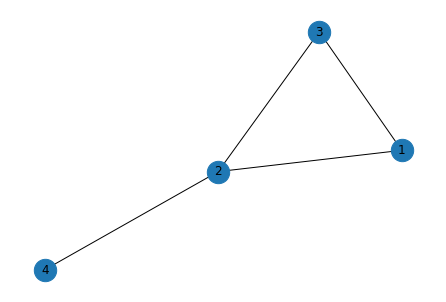

In [7]:
# 可视化
nx.draw(G, node_size=500, with_labels=True)

### 获取图的邻接矩阵

In [8]:
As = nx.adjacency_matrix(G)
print(As)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [9]:
# 转化成二维数组形式的矩阵
A = As.todense()
print(A)

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


### 已知图的邻接矩阵，创建图

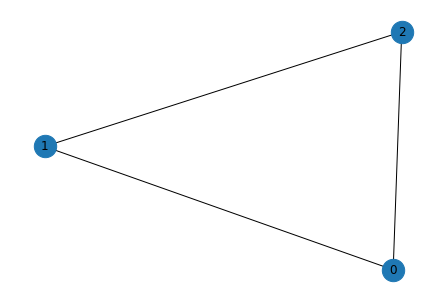

In [10]:
import numpy as np
A = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
G = nx.from_numpy_matrix(A)
nx.draw(G, node_size=500, with_labels=True)

### 加权图

In [11]:
G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])
As = nx.adjacency_matrix(G)
print(As.todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


### 有向图

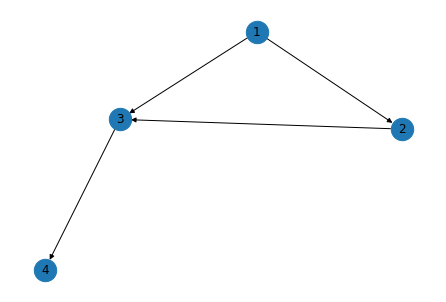

In [12]:
G = nx.DiGraph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(1,3),(2,3),(3,4)])
nx.draw(G, node_size=500, with_labels=True)

### 度、平均度以及度分布

In [13]:
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])

In [14]:
# 获取网络G的度
d = nx.degree(G)

In [15]:
d = dict(nx.degree(G))
print(d)
print("平均度为：", sum(d.values())/len(G.nodes))

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0


In [16]:
# 获取度分布
nx.degree_histogram(G) # 返回所有位于区间[0, dmax]的度值的频率列表

[0, 1, 2, 1]

### 绘制度分布直方图

In [21]:
import matplotlib.pyplot as plt

In [22]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

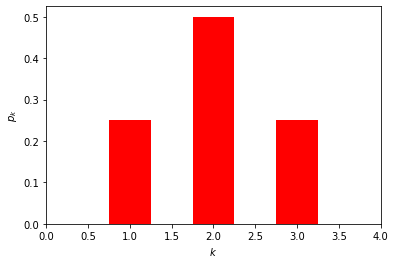

In [23]:
plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,4])

### 路径和距离

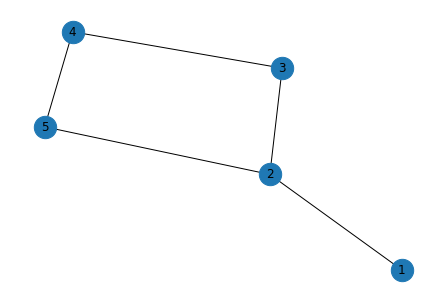

In [24]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(2,3),(2,5),(3,4),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [25]:
nx.shortest_path(G, source=1, target=4)

[1, 2, 3, 4]

In [26]:
# 两个节点之间所有的最短路径
list(nx.all_shortest_paths(G, source=1, target=4))

[[1, 2, 3, 4], [1, 2, 5, 4]]

In [27]:
# 求两个节点的最短路径长度（距离）
nx.shortest_path_length(G, source=1, target=4)

3

In [28]:
# 求整个网络的平均距离
nx.average_shortest_path_length(G)

1.6

### 连通性

In [29]:
Ga = nx.Graph()
Ga.add_nodes_from([1,2,3,4,5,6,7])
Ga.add_edges_from([(1,2),(1,3),(2,3),(4,7),(5,6),(5,7),(6,7)])
# nx.draw(Ga, node_size=500, with_labels=True)

In [30]:
Gb = nx.Graph()
Gb.add_nodes_from([1,2,3,4,5,6,7])
Gb.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,7),(5,6),(5,7),(6,7)])
# nx.draw(Gb, node_size=500, with_labels=True)

In [31]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


### 集聚系数

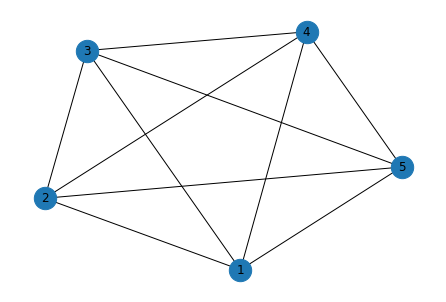

In [32]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [33]:
print(nx.clustering(G, 1))

1.0


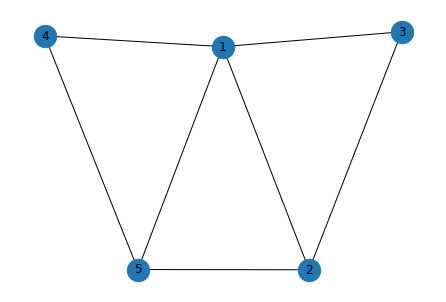

In [34]:
G.remove_edges_from([(2,4),(3,4),(3,5)])
nx.draw(G, node_size=500, with_labels=True)

In [35]:
print(nx.clustering(G, 1))

0.5


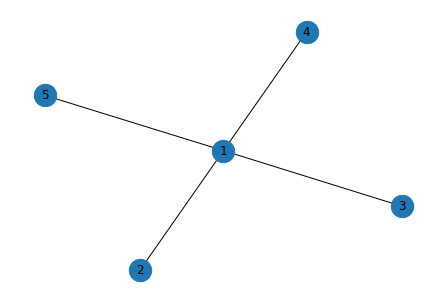

In [36]:
G.remove_edges_from([(2,3),(2,5),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [37]:
print(nx.clustering(G, 1))

0


### 平均集聚系数与全局集聚系数的区别

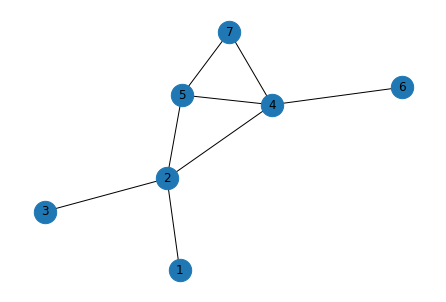

In [38]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [39]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [40]:
# 全局集聚系数
print(nx.transitivity(G))

0.375
